<center>
    <span style="color: #2E86C1; font-size: 3em;">
        &#128202; Exploratory Data Analysis
    </span>
</center>

# Nội dung Notebook

Notebook này được xây dựng nhằm thực hiện phân tích khám phá dữ liệu (Exploratory Data Analysis - EDA) cho tập dữ liệu đầu vào, với mục tiêu chính là hiểu rõ đặc điểm của dữ liệu thông qua các công đoạn:
* Nắm bắt nội dung các đặc trưng của dữ liệu.
* Kiểm tra tình trạng dữ liệu.
* Thống kê mô tả- Kiểm tra các phân vùng giá trị, min, max...
* Phát hiện dữ liệu bất thường (outlier).
* Kiểm tra tương quan giữa các đặc trưng.

<h1 align="center">📖 Mục lục</h1>

[I. Tổng quan dữ liệu](#i)
* [1. Thông tin về bộ dữ liệu từ Kaggle](#i1)
* [2. Bổ sung thư viện hỗ trợ](#i2)
* [3. Đọc dữ liệu](#i3)
* [4. Thông tin cơ bản của dữ liệu](#i4)

[II. Exploratory Data Analysis](#ii)


## I. Tổng quan dữ liệu <a id="i"></a>

### 1. Thông tin về bộ dữ liệu từ Kaggle <a id="i1"></a>

#### **Tổng quan**
Bộ dữ liệu được nhắc đến trong notebook được lấy từ cuộc thi trên Kaggle: [Prediction interval competition II: House price](https://www.kaggle.com/competitions/prediction-interval-competition-ii-house-price/overview)

Bộ dữ liệu cung cấp lượng lớn đặc trưng và đặc tính được sử dụng mục đích tối ưu khoảng dự đoán giá nhà. Đặc điểm nổi bật của cuộc thi không phải dự đoán giá nhà cụ thể cho mỗi mẫu, người thiết kế cần tính khoảng dự đoán cho căn nhà đó.

#### **Mô tả bộ dữ liệu**

* Định dạng dữ liệu: CSV
* Thành phần: bao gồm ba file CSV-train.csv; test.csv; sample_submission.csv
* Đặc trưng:
    - Định lượng (numerical): như diện tích sàn, tuổi nhà, số phòng, diện tích gara, ...
    - Phân loại (categorical): ví dụ: neighborhood, kiểu mái, hệ thống tiện ích, đường vào, ...
* Biến mục tiêu:
    * pi_lower: giá thấp nhất có thể xảy ra (lower bound)
    * pi_upper: giá cao nhất có thể xảy ra (upper bound)
    * sale_price (optional): giá trị dự đoán cho căn nhà.

### 2. Các thư viện hỗ trợ <a id="i2"></a>

Sử dụng thư viện gì nhớ add vào requirement.txt hộ

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 

### 3. Đọc dữ liệu <a id="i3"></a>

In [12]:
data_folder='../Dataset/'

In [13]:
data = pd.read_csv(data_folder + 'dataset.csv')
test_data = pd.read_csv(data_folder + 'test.csv')

### 4. Thông tin cơ bản của dữ liệu <a id="i4"></a>

#### 4.a Kích thước dữ liệu

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                200000 non-null  int64  
 1   sale_date         200000 non-null  object 
 2   sale_price        200000 non-null  int64  
 3   sale_nbr          157818 non-null  float64
 4   sale_warning      200000 non-null  object 
 5   join_status       200000 non-null  object 
 6   join_year         200000 non-null  int64  
 7   latitude          200000 non-null  float64
 8   longitude         200000 non-null  float64
 9   area              200000 non-null  int64  
 10  city              200000 non-null  object 
 11  zoning            200000 non-null  object 
 12  subdivision       182450 non-null  object 
 13  present_use       200000 non-null  int64  
 14  land_val          200000 non-null  int64  
 15  imp_val           200000 non-null  int64  
 16  year_built        20

In [15]:
data.shape

(200000, 47)

* Bộ dữ liệu cung cấp 46 đặc trưng gồm nhiều kiểu dữ liệu như int, float, object
* Tập dữ liệu trên bao gồm 200.000 mẫu dữ liệu, hầu hết đặc trưng đều có đầy đủ giá trị đồng thời cũng có một số đặc trưng bị khuyết giá trị.

#### 4.b Ý nghĩa của mẫu dữ liệu và đặc trưng

Mỗi dòng dữ liệu là một căn nhà riêng biệt, được ghi nhận thông qua các đặc điểm cụ thể như diện tích, chất lượng xây dựng, khu vực, năm xây dựng, tiện ích và các yếu tố khác, cùng với giá bán thực tế (trong tập huấn luyện).

Thông tin này phục vụ cho việc huấn luyện mô hình dự đoán khoảng giá bán cho các căn nhà tương tự trong tương lai.

| Tên đặc trưng         | Mô tả                |
|-----------------------|---------------------------------------------|
| id                    | Mã định danh cho căn nhà                     |
| sale_date             | Ngày bán                     |
| sale_price            | Giá bán                     |
| sale_nbr              | Số lần căn nhà được bán                    |
| sale_warning          | Mức cảnh báo giao dịch                     |
| join_status           | Trạng thái khi hợp với bộ dữ liệu khác                     |
| join_year             | Năm ghi nhận dữ liệu                     |
| latitude              | Vĩ độ căn nhà                     |
| longitude             | Kinh độ căn nhà                     |
| area                  | Mã khu vực                     |
| city                  | Thành phố                     |
| zoning                | Mã phân vùng quy định sử dụng đất                     |
| subdivision           | Tên khu dân cư                     |
| present_use           | Loại hình sử dụng hiện tại                     |
| land_val              | Giá trị đất thẩm định                     |
| imp_val               | Giá trị tổng thể (bao gồm cả đất)                     |
| year_built            | Năm gốc xây dựng                     |
| year_reno             | Năm cải tạo                     |
| sqft_lot              | Diện tích lô đất                     |
| sqft                  | Tổng diện tích xây dựng (nhiều tầng)                    |
| sqft_1                | Diện tích tầng 1 hoặc phần chính                     |
| sqft_fbsmt            | Diện tích tầng hầm                     |
| grade                 | Mức độ chất lượng xây dựng                     |
| fbsmt_grade           | Mức độ chất lượng tầng hầm                     |
| condition             | Tình trạng chung hoặc mức độ bảo trì của ngôi nhà.                     |
| stories               | Số tầng                     |
| beds                  | Số giường                     |
| bath_full             | Số phòng tắm 1/1                     |
| bath_3qtr             | Số phòng tắm 3/4                     |
| bath_half             | Số phòng tắm 1/2                     |
| garb_sqft             | Diện tích phòng rác                     |
| gara_sqft             | Diện tích gara                     |
| wfnt                  | Có nằm gần sông/ hồ                     |
| golf                  | Có nằm gần sân golf                     |
| greenbelt             | Có giáp khu vực vành đai xanh hoặc khu vực bảo tồn hay không.                     |
| noise_traffic         | Có bị ảnh hưởng bởi tiếng ồn hoặc lưu lượng giao thông cao hay không.                     |
| view_rainier          | Có tầm nhìn ra núi Rainier.                     |
| view_olympics         | Có tầm nhìn ra dãy núi Olympic.                     |
| view_cascades         | Có tầm nhìn ra dãy núi Cascade.                     |
| view_territorial      | Có tầm nhìn bao quát hoặc tầm nhìn rộng (không cụ thể).                     |
| view_skyline          | Có tầm nhìn ra đường chân trời của thành phố.                     |
| view_sound            | Có tầm nhìn ra vùng biển Puget Sound.                     |
| view_lakewash         | Có tầm nhìn ra hồ Washington.                     |
| view_lakesamm         | Có tầm nhìn ra hồ Sammamish.                     |
| view_otherwater       | Có tầm nhìn ra các vùng nước khác.                     |
| view_other            | Các loại tầm nhìn khác (không nằm trong các nhóm trên).                     |
| submarket             | Mã khu vực phụ hoặc phân vùng địa lý                     |


#### 4.c Trùng lặp và khuyết dữ liệu

In [17]:
data.duplicated().sum()

np.int64(0)

In [18]:
data.isnull().sum()

id                      0
sale_date               0
sale_price              0
sale_nbr            42182
sale_warning            0
join_status             0
join_year               0
latitude                0
longitude               0
area                    0
city                    0
zoning                  0
subdivision         17550
present_use             0
land_val                0
imp_val                 0
year_built              0
year_reno               0
sqft_lot                0
sqft                    0
sqft_1                  0
sqft_fbsmt              0
grade                   0
fbsmt_grade             0
condition               0
stories                 0
beds                    0
bath_full               0
bath_3qtr               0
bath_half               0
garb_sqft               0
gara_sqft               0
wfnt                    0
golf                    0
greenbelt               0
noise_traffic           0
view_rainier            0
view_olympics           0
view_cascade

Có thể thấy hiện tại bộ dữ liệu chỉ tồn tại vấn đề về kích thước với việc một số đặc trưng khuyết dữ liệu bao gồm: `sale_nbr`- 42182 mẫu , `subdivision`- 17550 mẫu , `submarket`- 1717 mẫu.

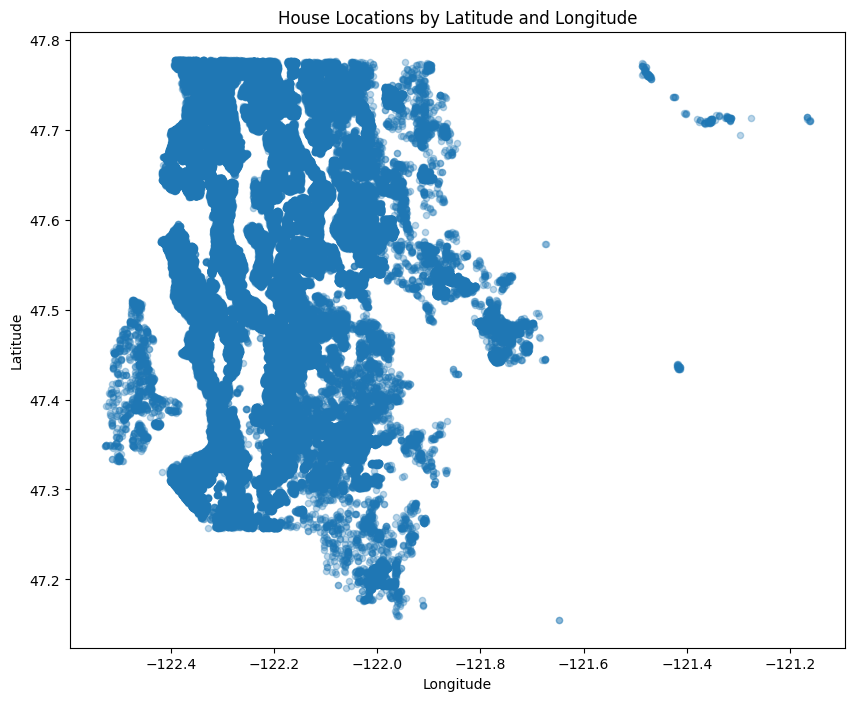

In [24]:
data.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.3,
    figsize=(10, 8)
)
plt.title("House Locations by Latitude and Longitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Nhận xét: Mặc dù không có thông tin về địa điểm cụ thể của các căn nhà, ta có thể thấy dữ liệu tập trung chủ yếu trong vùng kinh độ từ khoảng -122.4 đến -121.8 và vĩ độ từ 47.2 đến 47.8.

Đây rất có thể là `khu vực quanh thành phố Seattle, bang Washington, Mỹ, đặc biệt là khu vực King County `.

#### 4.d Tương quan dữ liệu

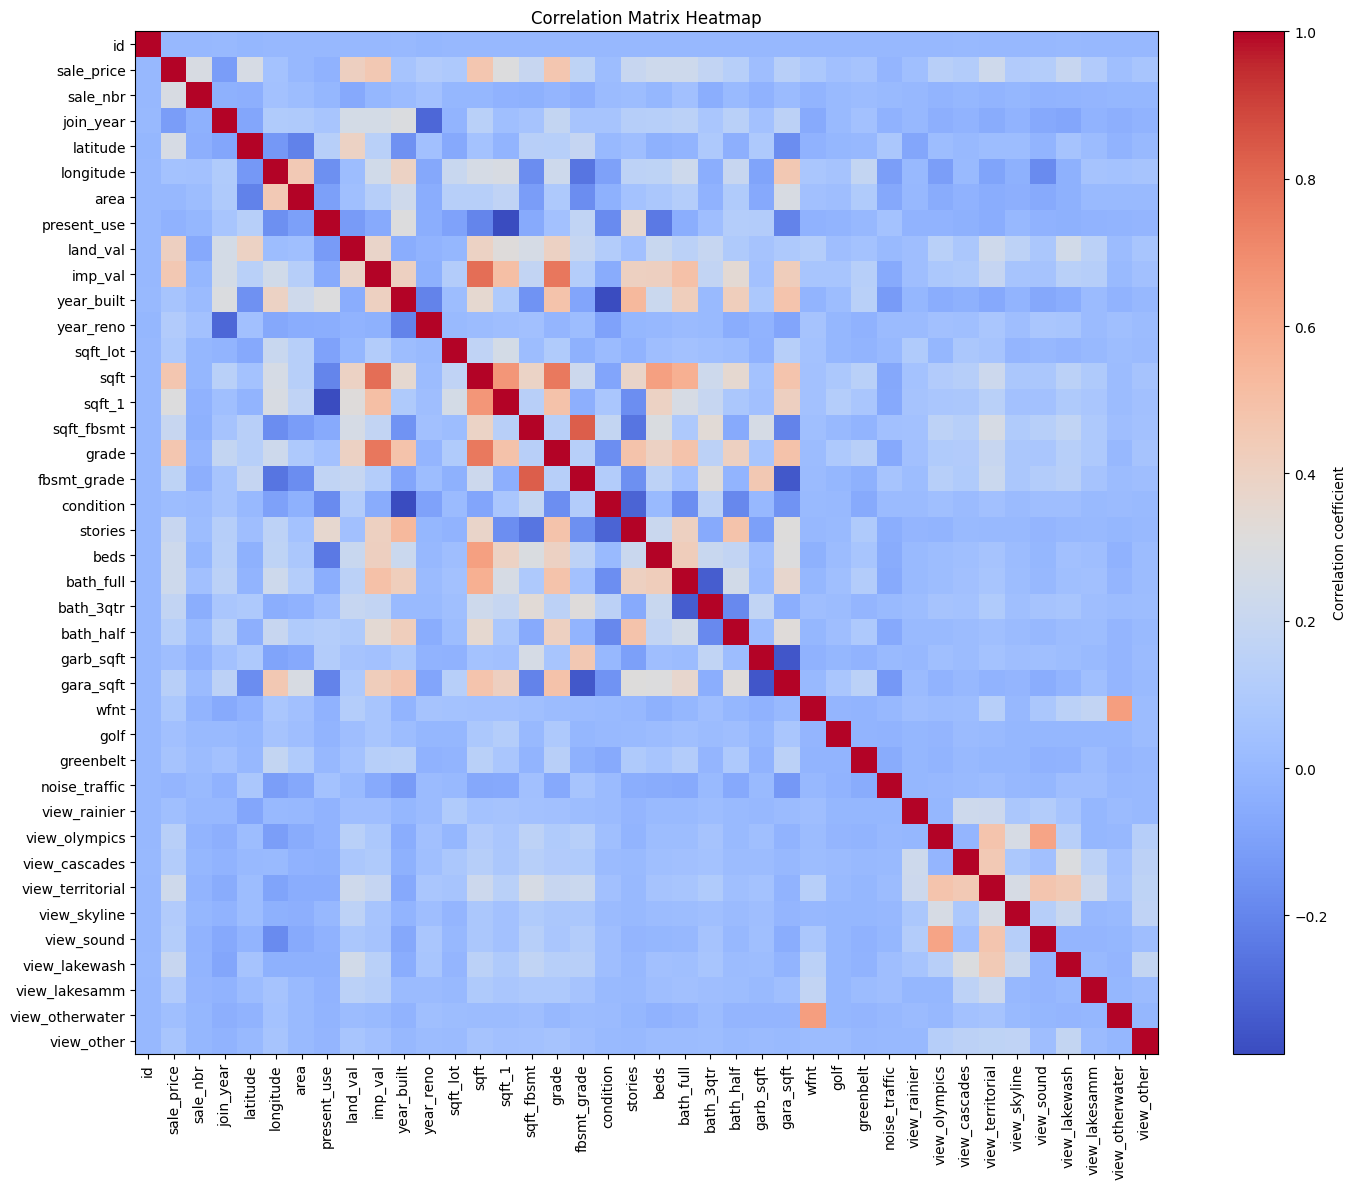

In [21]:
corr_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation coefficient')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


Bộ dữ liệu cho thấy tương quan mạnh mẽ giữa nhiều thành phần với nhau và với biến mục tiêu cần dự đoán, việc phân tích cụ thể từng thuộc tính sẽ được thực hiện ở phần tiếp theo để tìm ra các đặc điểm chi tiết hơn về bộ dữ liệu

## II. Exploratory Data Analysis <a id="ii"></a>

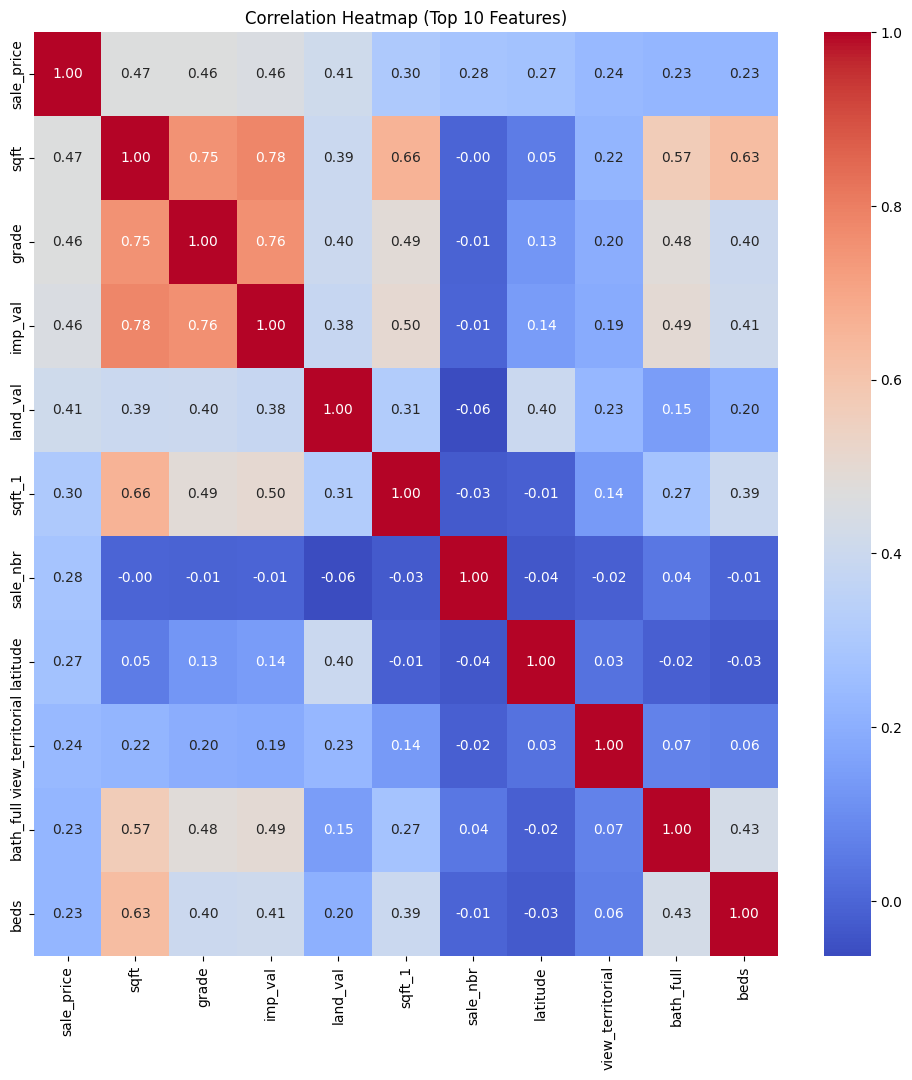

In [25]:
N_corr = 10  # Only show top 10 features most correlated with sale_price
corr = data.corr(numeric_only=True)
if 'sale_price' in corr.columns:
    top_corr = corr['sale_price'].abs().sort_values(ascending=False).head(N_corr+1).index  # +1 to include sale_price itself
    plt.figure(figsize=(1.2*N_corr, 1.2*N_corr))
    sns.heatmap(data[top_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Correlation Heatmap (Top {N_corr} Features)')
    plt.show()
else:
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=False, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()